In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
folder = "/content/gdrive/My Drive/RAship/ML/Dataset"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import mean_squared_error

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
pd_data_train = pd.read_csv('{0}/training.csv'.format(folder))
pd_data_test = pd.read_csv('{0}/testing.csv'.format(folder))

In [0]:
np_data_train = np.array(pd_data_train)
np_data_test = np.array(pd_data_test)

In [0]:
X_train = np_data_train[:,:4]
Y_train = np_data_train[:,4:]

X_test = np_data_test[:,:4]
Y_test = np_data_test[:,4:]

###  Create Decision Tree Regressor Model

In [0]:
decisionTree = DecisionTreeRegressor(random_state=0)

In [20]:
decisionTree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

#### Predict model

In [0]:
Y_pred = decisionTree.predict(X_test)

In [24]:
#Root mean square for Linear regression
rme = sqrt(mean_squared_error(Y_test, Y_pred))
print(rme)

0.260038241235


#### Calculate Percentage of Accuracy Measure

In [0]:
threshold_errors = [0.5,1,2,3,4,5]
perc_acc_measure = []

In [0]:
N = Y_test.shape[0]   # Total number of examples in testing data set


for t in threshold_errors:
    
    count = 0
    
    for i in range(Y_test.shape[0]):
        
        if( abs(Y_pred[i] - Y_test[i]) < t ):
            count += 1
            
    perc_acc_measure.append(count / N)
    
        

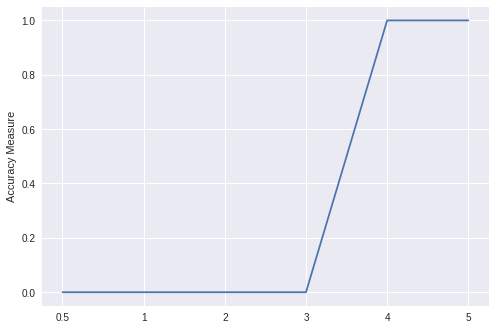

In [27]:
plt.ylabel('Accuracy Measure')
plt.plot(['0.5','1','2','3','4','5'],perc_acc_measure)